In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn

Example: Create a graph that will compute elementwise sum of two input vectors

In [2]:
tf.reset_default_graph()
a_value = [0.0, 1.0]
b_value = [1.0, 1.0]
a = tf.placeholder(dtype=tf.float32, name='a')
b = tf.placeholder(dtype=tf.float32, name='b')
c = a + b
with tf.Session() as sess:
    print sess.run(c, feed_dict={a: a_value, b: b_value })

[ 1.  2.]


Task 1. Create a graph that will compute dot product of two input vectors

In [8]:
tf.reset_default_graph()
a_value = [3.0, 1.0]
b_value = [3.0, 3.0]
a = tf.placeholder(dtype=tf.float32)
b = tf.placeholder(dtype=tf.float32)
c = tf.reduce_sum(a * b)
with tf.Session() as sess:
    print sess.run(c, feed_dict={a: a_value, b: b_value})

12.0


Task 2. Create a graph that given matrix $A$, returns a vector with sums over the second dimension.

In [9]:
# TODO tensor dimensions; rows / cols

tf.reset_default_graph()
a_value = [

    [3.0, 1.0, 2.0],
    [1.0, 13.0, 4.0],
    [3.0, 1.0, 2.0]
    ]
    
a = tf.placeholder(dtype=tf.float32)
s = tf.reduce_sum(a_value, 1)
with tf.Session() as sess:
    print sess.run(s, feed_dict={a: a_value})

[  6.  18.   6.]


Task 3. Apply relu, sigmoid, tanh to x

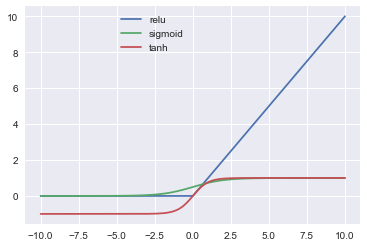

In [10]:
x_value = np.linspace(-10., 10., 1000)

x = tf.placeholder(dtype=tf.float32)
relu = tf.nn.relu(x_value)
sigmoid = tf.sigmoid(x_value)
tanh = tf.tanh(x_value)

with tf.Session() as sess:
    feed_dict = {x: x_value}
    _relu, _sigmoid, _tanh = sess.run([relu, sigmoid, tanh], feed_dict)
    plt.plot(x_value, _relu, label='relu')
    plt.plot(x_value, _sigmoid, label='sigmoid')
    plt.plot(x_value, _tanh, label='tanh')
    plt.legend(bbox_to_anchor=(0.5, 1.0))
    plt.show()

Task 4. Create operation to decrease variable $a$ by one

In [19]:
a = tf.Variable(10, dtype=tf.int32, name='a')
c = tf.constant(1, tf.int32)

# decrese_op = tf.subtract(a, c)
decrese_op = a - c

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in xrange(10):
        new_a = sess.run(decrese_op)
        ass_a = tf.assign(a, new_a)
        sess.run(ass_a)
        a_value = sess.run(a)
        print a_value

9
8
7
6
5
4
3
2
1
0


Task 5. Create operation that returns the shape of the input.

In [20]:
tf.reset_default_graph()
a_value = [
    [3, 7, 2, 1],
    [1, 1, 4, 5],
    [3, 6, 2, 2],
    ]
a = tf.placeholder(dtype=tf.int32)

sh = tf.shape(a)

with tf.Session() as sess:
    print sess.run(sh, {a: a_value})

[3 4]


Task 6. Create operation to get the first half of r-th row and second half of c-th column of the matrix. (Assume matrix has even dimensions).

In [24]:
tf.reset_default_graph()
a_value = [
    [3, 7, 2, 1],
    [1, 1, 4, 5],
    [3, 6, 2, 2],
    [6, 1, 1, 3],
    ]

r_value = 2
c_value = 1
    
a = tf.placeholder(dtype=tf.int32)
r = tf.placeholder(dtype=tf.int32)
c = tf.placeholder(dtype=tf.int32)

r_slice = tf.slice(a, [r, 0], [1, tf.shape(a)[1] / 2])
c_slice = tf.slice(a, [tf.shape(a)[0] / 2, c], [-1, 1])

# TODO how to flatten?

with tf.Session() as sess:
    r_s, c_s = sess.run([r_slice, c_slice], {a: a_value, r: r_value, c: c_value})
    print r_s, c_s

[[3 6]] [[6]
 [1]]


Task 7. Create operation that returns coordinates of the maximal element in the matrix. 

In [31]:
tf.reset_default_graph()
a_value = [
    [3, 7, 2, 1],
    [1, 1, 14, 5],
    [3, 6, 2, 17],
    [6, 9, 1, 3],
    ]

a = tf.placeholder(dtype=tf.int32)

# here we want create two lists (vectors) from the array
# for each (row) vector (0-dim)
#   1. max value
#   2. max arg (index)

row_max = tf.reduce_max(a, 0)
row_argmax = tf.argmax(a, 0)

# now we select the row which has the max value

col = tf.argmax(row_max, 0)
row = tf.reshape(tf.slice(row_argmax, [col], [1]), [])
# column = row_argmax[row]

with tf.Session() as sess:
    coors = [r, s] = sess.run([row, col], {a: a_value})
    print coors

[2, 3]
